In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import GaussianNB

**mean vector, cov matrix**

In [293]:
mean1 = [5,3]
cov1 = [[1.6,0],[0,1.6]]

mean2 = [2,5]
cov2 = [[0.7,0],[0,0.7]]

**Preprocessing**

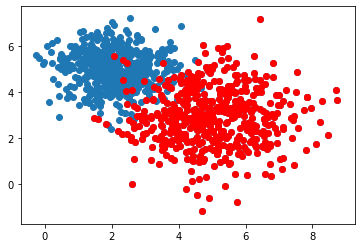

In [294]:
# input data
x1 = np.random.multivariate_normal(mean1, cov1, 500)
x2 = np.random.multivariate_normal(mean2, cov2, 500)

# class label
y1 = np.ones(500)
y2 = -1*np.ones(500)

# 두 class 데이터 합침
datax = np.concatenate((x1,x2), axis=0)
datay = np.concatenate((y1,y2), axis=0)

# 데이터 확인
plt.scatter(datax[:,0], datax[:,1])
plt.scatter(x1[:,0], x1[:,1], c="red")

**Train : Test 분할 => 0.7 : 0.3**

In [295]:
n_data = datax.shape[0]
p_trn = 0.7
n_trn = round(n_data*p_trn)

idx_array = np.array(range(0,n_data))
idx_array_perm = np.random.permutation(idx_array)

trnx = datax[idx_array_perm[0:n_trn],:]
trny = datay[idx_array_perm[0:n_trn]]
tstx = datax[idx_array_perm[n_trn:n_data],:]
tsty = datay[idx_array_perm[n_trn:n_data]]

print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(700, 2)
(300, 2)
(700,)
(300,)


**NB Classifier A**

In [296]:
clf = GaussianNB()
clf.fit(trnx, trny)
tsty_hat = clf.predict(tstx)

**Prior NB Classifier B**

In [297]:
clf2 = GaussianNB(priors=[0.8, 0.2])
clf2.fit(trnx, trny)
tsty_hat2 = clf2.predict(tstx)

__정확도 계산 및 비교__

In [298]:
dif = tsty - tsty_hat
accuracy = 1 - (np.size(np.where(dif != 0))/np.size(tsty))

dif2 = tsty - tsty_hat2
accuracy2 = 1 - (np.size(np.where(dif2 != 0))/np.size(tsty))

print('None Prior Accuracy: ', accuracy)
print('Prior Accuracy: ', accuracy2)
print('Accuracy Gap : ', accuracy - accuracy2)

None Prior Accuracy:  0.9566666666666667
Prior Accuracy:  0.96
Accuracy Gap :  -0.0033333333333332993


__그래프 표시__

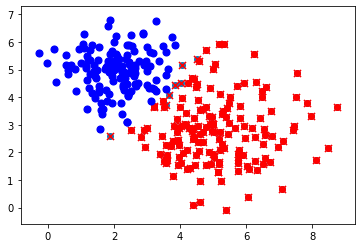

In [310]:
plt.scatter(tstx[:,0], tstx[:,1])
plt.scatter(tstx[np.where(tsty==1),0], tstx[np.where(tsty==1),1], c="red")
plt.scatter(tstx[np.where(tsty_hat==1),0], tstx[np.where(tsty_hat==1),1], c="red", marker='x', s=50)
plt.scatter(tstx[np.where(tsty_hat==-1),0], tstx[np.where(tsty_hat==-1),1], c="blue", marker='o',s=50)

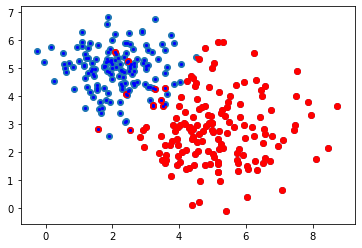

In [311]:
plt.scatter(tstx[:,0], tstx[:,1])
plt.scatter(tstx[np.where(tsty==1),0], tstx[np.where(tsty==1),1], c="red")
plt.scatter(tstx[np.where(tsty_hat2==1),0], tstx[np.where(tsty_hat2==1),1], c="red", marker='x', s=5)
plt.scatter(tstx[np.where(tsty_hat2==-1),0], tstx[np.where(tsty_hat2==-1),1], c="blue", marker='x',s=5)